<h1>Tâche 9 : Bandes de phonons</h1>
<p>Dans ce Jupyter Notebook, nous allons télécharger  la structure de bandes de phonons du matériau ScNiSb <code>mp-3432</code>. </p>
<p>Ensuite, nous allons calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin. </p>


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import fabs

from pymatgen.ext.matproj import MPRester
from pymatgen.phonon import bandstructure
from pymatgen.phonon import plotter

my_user_api_key = "RoIT1CX7DvB59O2S" # Materials Project legacy API key
m = MPRester(api_key=my_user_api_key)

PhononBands = m.get_phonon_bandstructure_by_material_id("mp-3432")

PhononPlot = plotter.PhononBSPlotter(PhononBands)


<h2>Première Zone de Brillouin : </h2>
On peut remarquer le chemin parcouru par le vecteur d'onde, abscisse des graphiques

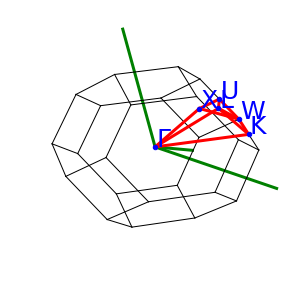

In [55]:
PhononPlot.plot_brillouin()

<h2>Structure de bande de phonons :</h2>

Text(0.5, 1.0, 'Structure de bande de phonons')

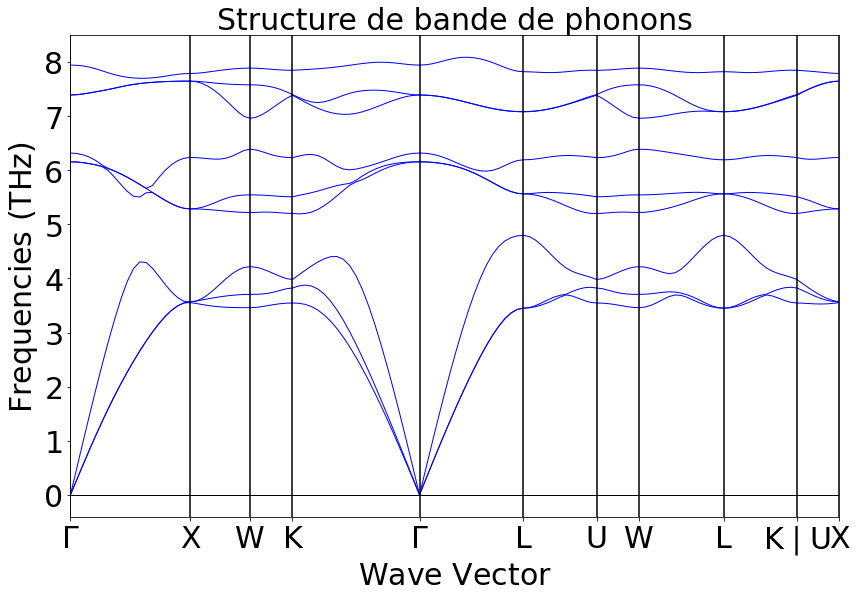

In [26]:
PhononPlot.get_plot()
plt.title("Structure de bande de phonons", fontsize=30)

<h2> Vitesse du Son</h2>
En se basant sur la théorie vu au cours, dans le modèle de la chaine monoatomique linéaire,
nous avons cette relation entre la fréquence agulaire $w$ et le vecteur d'onde $q$ :  $w = 2 
\sqrt{\frac{K}{M}} |\sin{\frac{qa}{2}}|$, avec a le paramètre de maille.
En effet, la vitesse du son $v_s$ peut être définie comme : $v_s = \frac{dw}{dq} = a \sqrt{\frac{K}{M}}\cos{\frac{qa}{2}}$. Lorque $q \longrightarrow 0$ (cas des grandes longeurs d'onde : $\lambda >>> a$), on a $\cos{\frac{qa}{2}} \longrightarrow 1 $ et $v_s \longrightarrow a \sqrt{\frac{K}{M}} = \frac{w}{|q|} = 2 \pi \frac{f}{|q|}$. 


In [62]:
distances   = Data.get("distances")
Frequencies = Data.get("frequency")
directions  = Data.get('ticks').get('label')


Data = PhononPlot.bs_plot_data()
Frequencies = Data.get('frequency')
Ks = Data.get('distances')
directions  = Data.get('ticks').get('label')

zone     = []
branche  = []
freq     = []

counter = 0
i = 0
while counter < 3:
    for j in range(len(Frequencies[i])):
        if Frequencies[i][j][0] == 0 and j not in branche and i not in zone:
            zone.append(i)
            branche.append(j)
            freq.append(Frequencies[i][j])
            counter += 1 
        elif Frequencies[i][j][-1] == 0 and j not in branche and i not in zone:
            zone.append(i)
            branche.append(j)
            freq.append(Frequencies[i][j])
            counter += 1
    i += 1



fact = 100 # le facteur correctif (Angstrom -> mètre et THz -> Hz)
directions = ("Γ - X","K - Γ","Γ - L")
indice = ((0,1),(-1,-2),(0,1))
a = np.zeros((3,1000))
d = np.zeros((3,1000))

for i in range(0,3) : 
    F = freq[i]
    q = distances[zone[i]]
    x = np.array([q[indice[i][0]],q[indice[i][1]]])
    y = np.array([F[indice[i][0]],F[indice[i][1]]])
    Coefficients = np.polyfit(x,y,1)
    a[i] = np.linspace(q[0],q[-1],1000)
    d[i] = Coefficients[0]*a[i]+Coefficients[1]
    print("La vitesse du son de la branche acoustique n°", branche[i]+1,
          "dans la direction",directions[i],"=", 2*pi*abs(Coefficients[0])*fact, "[m/s].")
    
    
################
# Verification #
################
#print("Branches :", branche)
#print("Zones : ", zone)
#print("Frequences : ", freq)

La vitesse du son de la branche acoustique n° 1 dans la direction Γ - X = 3204.619248172725 [m/s].
La vitesse du son de la branche acoustique n° 2 dans la direction K - Γ = 3355.357225887144 [m/s].
La vitesse du son de la branche acoustique n° 3 dans la direction Γ - L = 5532.02509886678 [m/s].


Ici le matériau n'est pas isotrope car la vitesse du son change en fonction de la direction.
<h2> Graphique</h2>
Les 3 bandes et leurs vitesses respectives sont respectivement coloriées

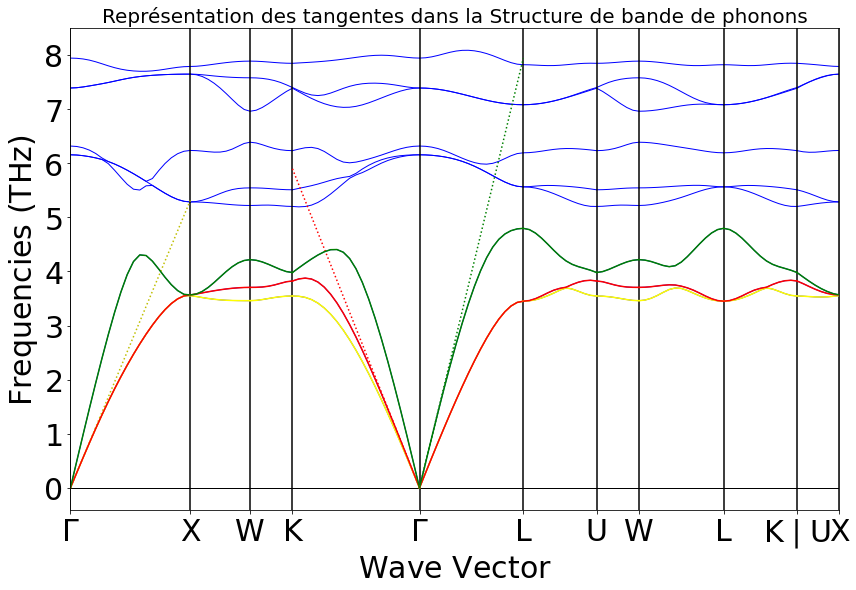

In [53]:
PhononPlot.get_plot()
plt.title("Représentation des tangentes dans la Structure de bande de phonons", fontsize=20)

plt.plot(a1,d1,color='y',ls=':')
plt.plot(a2,d2,color='r',ls=':')
plt.plot(a3,d3,color='g',ls=':')

for i in range(len(Ks)): # On plot pour chaque chemin de la zone de Brillouin
    plt.plot(Ks[i],Frequencies[i][0],'yellow')  #On trace la première branche acoustique
    plt.plot(Ks[i],Frequencies[i][1],'red')    #On trace la deuxième branche acoustique
    plt.plot(Ks[i],Frequencies[i][2],'green') #On trace la troisième branche acoustique
plt.show()

<h2>Bibliographie</h2>
<ul>
  <li>
    LMAPR1492 - Physique des Matériaux
    
  </li>
  <li>
    <a href="https://moodle.uclouvain.be/mod/resource/view.php?id=27700 "> Chapitre 4: Les électrons dans le cristal (notes manuscrites)</a> Chapitre particulièrement utilisé du cours LMAPR1492 - Physique des Matériaux
  </li>
  <li>
    <a href="https://www.youtube.com/@Niavem/playlists">Michel Evain (Chaîne YouTube )</a> -
    Cours vidéos sur la cristallographie.
  </li>
  <li>
    <a href="https://materialsproject.org/">Materials Project</a> -
    Base de données en ligne contenant des informations sur les propriétés des matériaux.
  </li>
</ul> 